In [53]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
import camb
from camb import model, initialpower
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
import numpy as np
import sympy as sy
from sympy import symbols
import matplotlib
from matplotlib import pyplot as plt

In [54]:
##PARAMETRI INIZIALI

pars = camb.CAMBparams()  #0.022 0.122 67.5
pars.set_cosmology(H0=73, ombh2=0.023, omch2=0.111)   #H0= hubble parameter today in km/s    ombh2=physical density in baryons omch2=physical density in cold dark matter
#trovo densità diverse...
pars.InitPower.set_params(ns=0.965)  #ns = scalar spectra index (inflaction)


class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.965
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

In [55]:
pars.set_matter_power(redshifts=[1], kmax=2.0)  
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)   

In [56]:
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1e-1, npoints = 100) #nota, le z vengono ordinate

In [57]:
H0 = results.hubble_parameter(0) 
h = H0/100
def H(z):
    return results.hubble_parameter(z)

In [58]:
bias = 1 + z[0]*0.84   #funzione di bias delle galassie, cercane altre!!
f = (results.get_fsigma8()/results.get_sigma8())
 #la calcola alla z scelta già, UNITà DI MISURA

kh = kh/h  #H0 = 70km/(s*Mpc) h=0.7 ma non era senza unità di misura?
pk = pk*h**3

mu = np.arange(-1,1,0.1)      #range di valori dell'angolo
N = len(kh)*len(mu)   #numero di dati simulati

In [59]:
om = results.get_Omega('cdm',0) + results.get_Omega('baryon',0)
omz= om*(1+z[0])**3/(H(z[0])/H0)**2 #densità di materia a diverso z
omz

0.7263075672165862

In [60]:
#Set di dati simulati spettro di potenza delle galassie

Pgg = np.empty((len(kh),len(mu)))


for i in range (len(kh)):
    for j in range (len(mu)):
        Pgg[i][j] = ( float((bias + omz**0.545 * (mu[j]**2))**2*pk[:,i]))


In [61]:
Pgg[1][2]


4603.689619595524

In [62]:
print(f)
print(omz**0.545)

[0.84301527]
0.8400607816767275


In [63]:
##Errori dei dati simulati
ng= 15e-4   #mean galaxy number density for z near 0 (Euclid spettroscopy survey)
DeltaMu = np.abs(mu[0]-mu[1])
DeltaZ = 1
DeltaK = np.empty((len(kh)))

for i in range (len (kh)):
    if i==0 : DeltaK[i]= np.abs(kh[i+1]-kh[i])
    elif i==len(kh)-1:
       DeltaK[i]= np.abs(kh[i-1]-kh[i])
    else: DeltaK[i]= np.abs(kh[i+1]-kh[i])/2+ np.abs(kh[i-1]-kh[i])/2
    
    
cost=(3e8/70)**3  #coefficiente per trasformare il redshift in un raggio

N = np.empty((len(kh),len(mu)))
Vol = 4./3.*np.pi*(cost*(z[0]+DeltaZ/2)**3-(z[0]-DeltaZ/2)**3)

for j in range(len(kh)):
    N[j,:]= Vol*1/(2*np.pi)**2 * kh[j]**2*DeltaMu*DeltaK[j]  #uguale per tutte le mu

err_Pgg = np.empty((len(kh),len(mu)))
for i in range (len(kh)):
    for j in range (len(mu)):
        err_Pgg[i][j] = np.sqrt(2/N[i][j])*(Pgg[i][j]+1/ng)




In [64]:
gammas= np.arange(0.400,0.600,0.001)


for k in range(len(gammas)):
    gammas[k] = round (gammas[k],3)
    print(gammas[k])
    



0.4
0.401
0.402
0.403
0.404
0.405
0.406
0.407
0.408
0.409
0.41
0.411
0.412
0.413
0.414
0.415
0.416
0.417
0.418
0.419
0.42
0.421
0.422
0.423
0.424
0.425
0.426
0.427
0.428
0.429
0.43
0.431
0.432
0.433
0.434
0.435
0.436
0.437
0.438
0.439
0.44
0.441
0.442
0.443
0.444
0.445
0.446
0.447
0.448
0.449
0.45
0.451
0.452
0.453
0.454
0.455
0.456
0.457
0.458
0.459
0.46
0.461
0.462
0.463
0.464
0.465
0.466
0.467
0.468
0.469
0.47
0.471
0.472
0.473
0.474
0.475
0.476
0.477
0.478
0.479
0.48
0.481
0.482
0.483
0.484
0.485
0.486
0.487
0.488
0.489
0.49
0.491
0.492
0.493
0.494
0.495
0.496
0.497
0.498
0.499
0.5
0.501
0.502
0.503
0.504
0.505
0.506
0.507
0.508
0.509
0.51
0.511
0.512
0.513
0.514
0.515
0.516
0.517
0.518
0.519
0.52
0.521
0.522
0.523
0.524
0.525
0.526
0.527
0.528
0.529
0.53
0.531
0.532
0.533
0.534
0.535
0.536
0.537
0.538
0.539
0.54
0.541
0.542
0.543
0.544
0.545
0.546
0.547
0.548
0.549
0.55
0.551
0.552
0.553
0.554
0.555
0.556
0.557
0.558
0.559
0.56
0.561
0.562
0.563
0.564
0.565
0.566
0.567
0.568
0.569

In [83]:
chi2 = np.zeros(len(gammas))



In [81]:

for k in range(len(gammas)):
    for i in range (len(kh)):
        for j in range (len(mu)):

            chi2[k]= chi2[k]+((float((bias + (omz**gammas[k]) * (mu[j])**2)**2*pk[:,i])-Pgg[i][j])**2/err_Pgg[i][j]**2)


In [82]:
min= np.min(chi2)
index_min = np.argmin(chi2)
gamma_min = gammas[index_min]
min


0.0

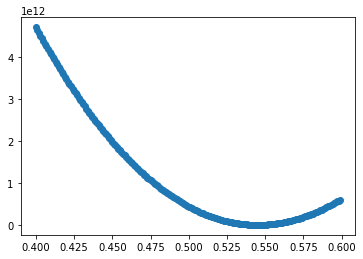

In [67]:
plt.scatter(gammas,chi2)

In [68]:
chi2

array([4.70795541e+012, 4.64138068e+012, 4.57530623e+012, 4.50973149e+012,
       4.44465587e+012, 4.38007881e+012, 4.31599973e+012, 4.25241805e+012,
       4.18933320e+012, 4.12674460e+012, 4.06465168e+012, 4.00305387e+012,
       3.94195059e+012, 3.88134128e+012, 3.82122536e+012, 3.76160226e+012,
       3.70247142e+012, 3.64383225e+012, 3.58568420e+012, 3.52802669e+012,
       3.47085916e+012, 3.41418104e+012, 3.35799176e+012, 3.30229076e+012,
       3.24707747e+012, 3.19235133e+012, 3.13811176e+012, 3.08435822e+012,
       3.03109013e+012, 2.97830693e+012, 2.92600806e+012, 2.87419296e+012,
       2.82286106e+012, 2.77201181e+012, 2.72164464e+012, 2.67175900e+012,
       2.62235433e+012, 2.57343007e+012, 2.52498566e+012, 2.47702054e+012,
       2.42953415e+012, 2.38252595e+012, 2.33599538e+012, 2.28994187e+012,
       2.24436488e+012, 2.19926385e+012, 2.15463822e+012, 2.11048745e+012,
       2.06681099e+012, 2.02360827e+012, 1.98087875e+012, 1.93862189e+012,
       1.89683711e+012, 1